In [103]:
#Using SDEint library: https://pypi.org/project/sdeint/
#Generate synthetic data from each of the three models

import numpy as np
import matplotlib.pyplot as plt
import sdeint
import math
np.random.seed(100)

# To display plots directly in the notebook:
%matplotlib inline

import pandas as pd
import seaborn as sns
from scipy import stats
sns.set(color_codes=True)

#universal parameters for all models
D_T=0.01
k=0.5

#number of simulations/training trajs for each model
M=1000

##########################################
#model-specific parameters
#Active BM -- self-propelled, +non-Gaussian noise
v0=np.random.uniform(0.5,1,1)
D_R=np.random.uniform(0.1,0.2,1)

#drift and noise coefficient
def f(x,t):
    f0=v0*np.cos(x[2])-k*x[0] 
    f1=v0*np.sin(x[2])-k*x[1]
    f2=0
    return np.array([f0,f1,f2])
    
def g(x,t):
    g0=np.sqrt(2*D_T)
    g1=g0
    g2=np.sqrt(2*D_R)
    return np.array([g0, g1, g2]).reshape((3,1))

#initial conditions
x0=0.0; x1=0.0; x2=np.random.uniform(0,2*math.pi,1)

T=1; N=100; dt=T/N 
t=np.linspace(0,T,N+1) #vector of N dims
xzero = np.array([x0, x1, x2])

x_m1 = [sdeint.itoint(f, g, xzero, t) for _ in range(M)]
x_m1 = np.array(x_m1)

np.savetxt('trajx_m1.csv', np.c_[np.insert(x_m1[:,:,0], N+1, 1, axis=1)], delimiter=',')    #save M number of x-variable trajectories over N+1 discretized grids
np.savetxt('trajy_m1.csv', np.c_[np.insert(x_m1[:,:,1], N+1, 1, axis=1)], delimiter=',')    #save M number of y-variable trajectories over N+1 discretized grids

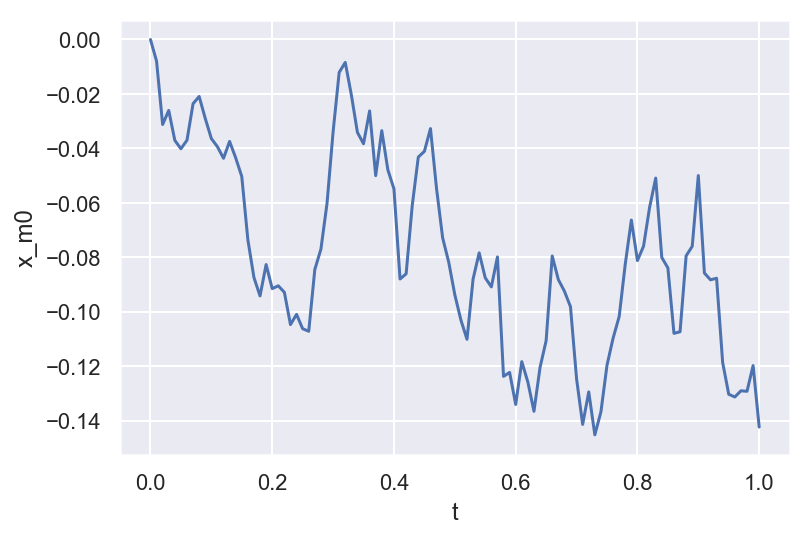

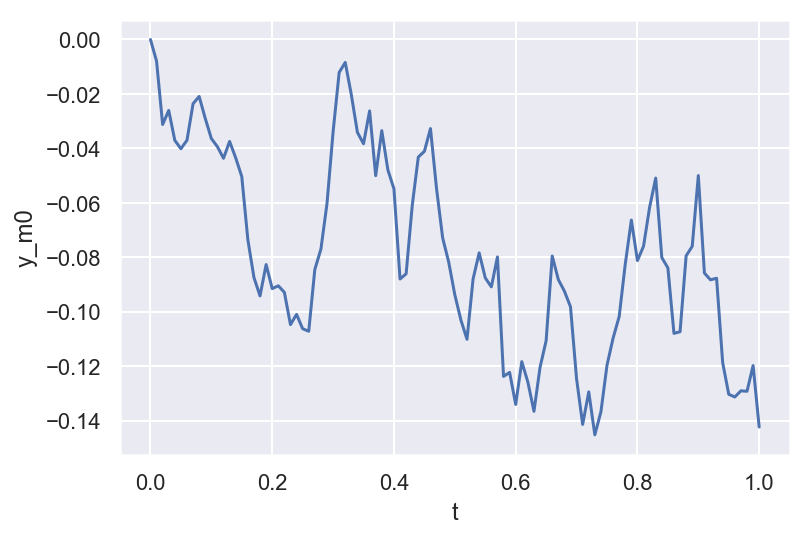

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import sdeint
import math
np.random.seed(100)

import pandas as pd
import seaborn as sns
from scipy import stats
sns.set(color_codes=True)

#universal parameters for all models
D_T=0.01
k=0.5

#number of simulations/training trajs for each model
M=1000

#model-specific parameters
#Passive BM -- zero additional noise
v0=0.0
D_R=0.01

#drift and noise coefficient
def f(x,t):
    f0=v0*np.cos(x[2])-k*x[0] 
    f1=v0*np.sin(x[2])-k*x[1]
    f2=0
    return np.array([f0,f1,f2])

def g(x,t):
    g0=np.sqrt(2*D_T)
    g1=g0
    g2=np.sqrt(2*D_R)
    return np.array([g0, g1, g2]).reshape((3,1))

#initial conditions
x0=0.0; x1=0.0; x2=np.random.uniform(0,2*math.pi,1)

T=1; N=100; dt=T/N 
t=np.linspace(0,T,N+1) #vector of N dims
xzero = np.array([x0, x1, x2])

x_m0 = [sdeint.itoint(f, g, xzero, t) for _ in range(M)]
x_m0 = np.array(x_m0)

plt.plot(t, x_m0[0,:,0])
plt.xlabel('t')
plt.ylabel('x_m0')
plt.show()
plt.plot(t,x_m0[0,:,1])
plt.xlabel('t')
plt.ylabel('y_m0')
plt.show()

np.savetxt('trajx_m0.csv', np.c_[np.insert(x_m0[:,:,0], N+1, 0, axis=1)], delimiter=',')    #save M number of x-variable trajectories over N+1 discretized grids
np.savetxt('trajy_m0.csv', np.c_[np.insert(x_m0[:,:,1], N+1, 0, axis=1)], delimiter=',')    #save M number of y-variable trajectories over N+1 discretized grids

In [105]:
import matplotlib.pyplot as plt
import sdeint
import math
np.random.seed(100)

import pandas as pd
import seaborn as sns
from scipy import stats
sns.set(color_codes=True)

#universal parameters for all models
D_T=0.01
k=0.5

#number of simulations/training trajs for each model
M=1000

#model-specific parameters
#Active OUP --- +(indep) OU process
v0=np.random.uniform(0.5,1,1)
alpha=0.1 #np.random.uniform(0.1,0.2,1)
D_A=alpha
#np.random.uniform(0.1,0.2,1)

#drift and noise coefficient
def f(x,t):
    f0=v0*x[2]-k*x[0] 
    f1=v0*x[3]-k*x[1]
    f2=-alpha*x[2]
    f3=f2
    return np.array([f0,f1,f2,f3])
    
def g(x,t):
    g0=np.sqrt(2*D_T)
    g1=g0
    g2=np.sqrt(2*D_A)
    g3=g2
    return np.array([g0, g1, g2, g3]).reshape((4,1))

#initial conditions
x0=0.0; x1=0.0; x2=np.sqrt(D_A/alpha)*np.random.randn(); x3=np.sqrt(D_A/alpha)*np.random.randn() 

T=1; N=100; dt=T/N 
t=np.linspace(0,T,N+1) #vector of N dims
xzero = np.array([x0, x1, x2, x3])

x_m2 = [sdeint.itoint(f, g, xzero, t) for _ in range(M)]
x_m2 = np.array(x_m2)

np.savetxt('trajx_m2.csv', np.c_[np.insert(x_m2[:,:,0], N+1, 2, axis=1)], delimiter=',')    #save M number of x-variable trajectories over N+1 discretized grids
np.savetxt('trajy_m2.csv', np.c_[np.insert(x_m2[:,:,1], N+1, 2, axis=1)], delimiter=',')    #save M number of y-variable trajectories over N+1 discretized grids

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math

# First, we get the data
dataset0 = pd.read_csv("/Users/soonhoe/Desktop/AAA Python/trajx_m0.csv",header=None)
dataset1 = pd.read_csv("/Users/soonhoe/Desktop/AAA Python/trajx_m1.csv",header=None)
dataset2 = pd.read_csv("/Users/soonhoe/Desktop/AAA Python/trajx_m2.csv",header=None)

li = []
li.append(dataset0)
li.append(dataset1)
li.append(dataset2)

dataset = np.array(pd.concat(li, axis=0, ignore_index=True))
np.random.shuffle(dataset)
dataset = pd.DataFrame(dataset)

np.savetxt('all_traj.csv', np.c_[dataset], delimiter=',') 

dataset.head(10)
row=np.shape(dataset)[0]
col=np.shape(dataset)[1]
print(row); print(col)

3000
102


In [18]:
num_train = int(row*2/3)
num_val = 500
num_test = 500
training_set = dataset[:num_train].iloc[:,0:col].values
valid_set = dataset[num_train:num_train+num_val].iloc[:,0:col].values
test_set = dataset[num_train+num_val:].iloc[:,0:col].values
print(np.shape(training_set)); print(np.shape(valid_set)), print(np.shape(test_set))
training_df = pd.DataFrame(training_set)
training_df.head(10)

(2000, 102)
(500, 102)
(500, 102)


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,0.0,0.006985,0.035564,0.034720,0.006947,-0.008856,-0.015247,-0.045017,-0.052041,-0.047184,...,-0.474568,-0.482252,-0.484849,-0.487692,-0.470671,-0.488333,-0.500687,-0.517698,-0.524393,2.0
1,0.0,-0.002221,-0.005594,-0.026881,-0.014561,-0.026500,-0.022985,-0.023548,-0.008301,-0.010763,...,-0.636317,-0.632889,-0.635749,-0.655288,-0.643982,-0.638891,-0.630591,-0.617432,-0.616045,1.0
2,0.0,-0.011734,-0.018509,-0.016477,0.012473,-0.015787,-0.046198,-0.024845,-0.032390,-0.040271,...,-0.611230,-0.591286,-0.582375,-0.565889,-0.595520,-0.588024,-0.586256,-0.590560,-0.582104,1.0
3,0.0,-0.010801,-0.018972,-0.019519,-0.010412,-0.018815,-0.010876,-0.011772,-0.012922,-0.041433,...,-0.484645,-0.488805,-0.501387,-0.515429,-0.526067,-0.511864,-0.495999,-0.482107,-0.500214,1.0
4,0.0,0.010820,0.034871,0.053619,0.061437,0.066785,0.074587,0.071091,0.072633,0.074537,...,0.199917,0.198778,0.209724,0.225503,0.220023,0.211531,0.185091,0.189016,0.183064,0.0
5,0.0,0.012766,0.014717,0.001465,-0.008304,0.007852,-0.007215,-0.037910,-0.030730,-0.035962,...,-0.422309,-0.411175,-0.417837,-0.417136,-0.405119,-0.410418,-0.403529,-0.398482,-0.417024,1.0
6,0.0,-0.019367,-0.042714,-0.077815,-0.110432,-0.137279,-0.169061,-0.181392,-0.186013,-0.209576,...,-0.384424,-0.356135,-0.349199,-0.355525,-0.352948,-0.320397,-0.341482,-0.312394,-0.293771,2.0
7,0.0,-0.004347,-0.006767,-0.017493,-0.028477,-0.037630,-0.043260,-0.042559,-0.058528,-0.074925,...,-1.034177,-1.033173,-1.009776,-1.011729,-1.014977,-1.032324,-1.021473,-1.020724,-1.003266,2.0
8,0.0,0.006384,-0.010718,-0.015430,0.015531,0.021777,0.012913,0.028465,0.041856,0.017469,...,0.253997,0.248872,0.249196,0.242478,0.238715,0.257333,0.264806,0.286875,0.251570,0.0
9,0.0,0.003476,-0.023470,-0.025293,-0.049555,-0.031803,-0.063281,-0.062028,-0.057677,-0.079968,...,-0.315595,-0.330661,-0.347565,-0.335593,-0.358700,-0.373850,-0.379544,-0.425143,-0.453143,2.0


In [19]:
#hyperparameters
batch_size = 500
epochs = 800

#number of categories
num_classes = 3

# the data, split between train and test sets
x_train=training_set[:,:col-1]
y_train=training_set[:,col-1:]
x_valid=valid_set[:,:col-1]
y_valid=valid_set[:,col-1:]
x_test=test_set[:,:col-1]
y_test=test_set[:,col-1:]

x_train = x_train.reshape(num_train, col-1)
x_valid = x_valid.reshape(num_val, col-1)
x_test = x_test.reshape(num_test, col-1)
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')
print(np.shape(x_train)); print(np.shape(x_valid)); print(np.shape(x_test))
print(np.shape(y_train)); print(np.shape(y_valid)); print(np.shape(y_test))

2000 train samples
500 validation samples
500 test samples
(2000, 101)
(500, 101)
(500, 101)
(2000, 1)
(500, 1)
(500, 1)


In [20]:
#test accuracy of a random baseline
import copy
y_test_copy=copy.copy(y_test)
np.random.shuffle(y_test_copy)
float(np.sum(np.array(y_test)==np.array(y_test_copy)))/len(y_test)

0.332

In [52]:
import torch

from torch.utils import data

#Reference: https://www.kaggle.com/pinocookie/pytorch-dataset-and-dataloader
class Dataset_train():
    
    def __init__(self, transform=None):
        #self.data = pd.read_csv(file_path)
        self.data = training_set
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        x_train=training_set[:,:col-1]
        y_train=training_set[:,col-1:]
        x_train = x_train.reshape(num_train, col-1)
        x_train = x_train.astype('float32')
        
        if self.transform is not None:
            image = self.transform(image)
            
        image = x_train[index,:]
        label = y_train[index]

        return image, label

class Dataset_valid():
    
    def __init__(self, transform=None):
        self.data = valid_set
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        x_valid=valid_set[:,:col-1]
        y_valid=valid_set[:,col-1:]
        x_valid = x_valid.reshape(num_val, col-1)
        x_valid = x_valid.astype('float32')
        
        if self.transform is not None:
            image = self.transform(image)
            
        image = x_valid[index,:]
        label = y_valid[index]

        return image, label
    
    
class Dataset_test():
    
    def __init__(self, transform=None):
        #self.data = pd.read_csv(file_path)
        self.data = test_set
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        x_test=test_set[:,:col-1]
        y_test=test_set[:,col-1:]

        x_test = x_test.reshape(num_test, col-1)
        x_test = x_test.astype('float32')
        image = x_test[index,:]
        label = y_test[index]

        return image, label
    
# Download and load the training data
trainset = Dataset_train()

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

validset = Dataset_valid()
testset = Dataset_test()
validloader = torch.utils.data.DataLoader(validset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [44]:
import torch
from torch import nn, optim
import torch.nn.functional as F

In [67]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(101,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,3)
        self.dropout = nn.Dropout(p=0.1)
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = F.log_softmax(self.fc3(x),dim=1)
        return x

In [98]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

epochs = 30 
steps = 0

train_losses, valid_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        labels = labels.view(images.shape[0])
        labels = labels.long()

        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        valid_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            model.eval()
            for images, labels in validloader:
                images = images.view(images.shape[0], -1)
                labels = labels.view(images.shape[0])
                labels = labels.long()
                
                log_ps = model(images)
                valid_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                                
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        valid_losses.append(valid_loss/len(validloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Valid Loss: {:.3f}.. ".format(valid_loss/len(validloader)),
              "Valid Accuracy: {:.3f}".format(accuracy/len(validloader)))

Epoch: 1/30..  Training Loss: 0.777..  Valid Loss: 0.595..  Valid Accuracy: 0.772
Epoch: 2/30..  Training Loss: 0.461..  Valid Loss: 0.417..  Valid Accuracy: 0.846
Epoch: 3/30..  Training Loss: 0.354..  Valid Loss: 0.408..  Valid Accuracy: 0.842
Epoch: 4/30..  Training Loss: 0.329..  Valid Loss: 0.343..  Valid Accuracy: 0.884
Epoch: 5/30..  Training Loss: 0.302..  Valid Loss: 0.369..  Valid Accuracy: 0.875
Epoch: 6/30..  Training Loss: 0.283..  Valid Loss: 0.347..  Valid Accuracy: 0.883
Epoch: 7/30..  Training Loss: 0.281..  Valid Loss: 0.317..  Valid Accuracy: 0.893
Epoch: 8/30..  Training Loss: 0.258..  Valid Loss: 0.339..  Valid Accuracy: 0.890
Epoch: 9/30..  Training Loss: 0.241..  Valid Loss: 0.314..  Valid Accuracy: 0.901
Epoch: 10/30..  Training Loss: 0.252..  Valid Loss: 0.351..  Valid Accuracy: 0.874
Epoch: 11/30..  Training Loss: 0.239..  Valid Loss: 0.320..  Valid Accuracy: 0.901
Epoch: 12/30..  Training Loss: 0.243..  Valid Loss: 0.321..  Valid Accuracy: 0.888
Epoch: 13/30.

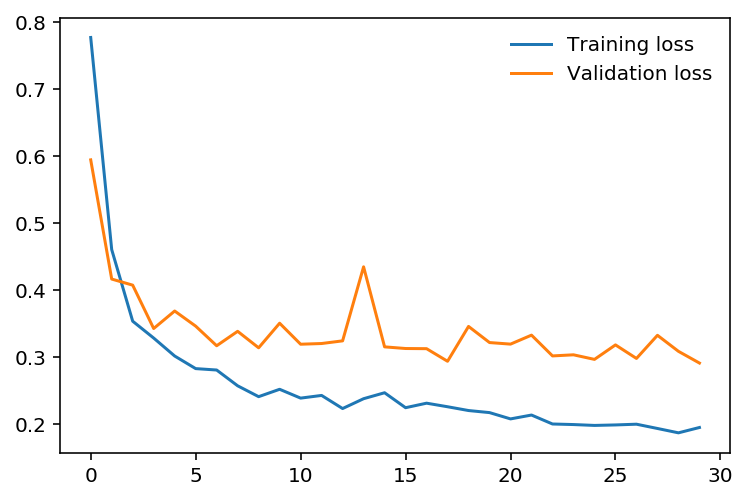

In [99]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)

In [100]:
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 101)

#Calculate the class probabilities (softmax)
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)
print(ps)
print(labels[0])

tensor([[9.9612e-01, 4.3539e-08, 3.8807e-03]])
tensor([0.], dtype=torch.float64)


In [101]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Classifier(
  (fc1): Linear(in_features=101, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias'])


In [102]:
from sklearn.metrics import confusion_matrix

test_loss = 0
accuracy = 0

# Turn off gradients for validation, saves memory and computations
with torch.no_grad():
    model.eval()
    for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        labels = labels.view(images.shape[0])
        labels = labels.long()

        log_ps = model(images)
        test_loss += criterion(log_ps, labels)

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))

    print(confusion_matrix(labels,top_class))

model.train()

train_losses.append(running_loss/len(trainloader))
test_losses.append(test_loss/len(testloader))

print("Epoch: {}/{}.. ".format(e+1, epochs),
      "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
      "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
      "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

[[11  0  0]
 [ 0 19  1]
 [ 3  2 16]]
Epoch: 30/30..  Training Loss: 0.195..  Test Loss: 0.195..  Test Accuracy: 0.943


In [97]:
#save the model if needed
#torch.save(model.state_dict(), 'traj_pyt.pth')

#state_dict = torch.load('traj_pyt.pth')
#print(state_dict.keys())

#model.load_state_dict(state_dict)